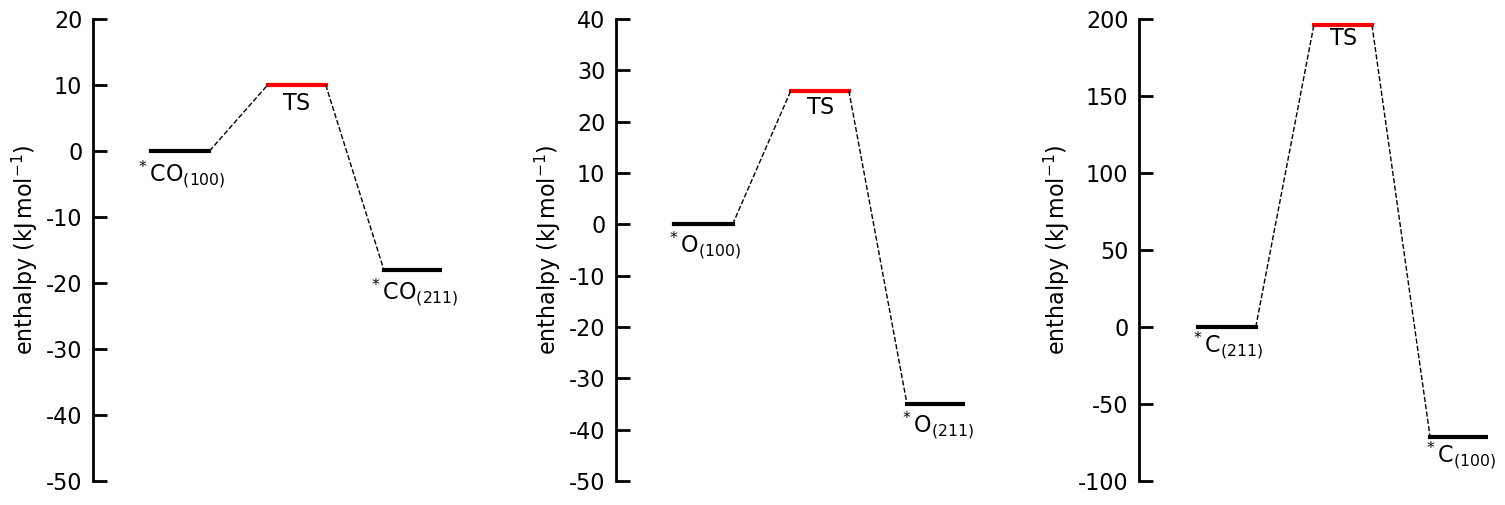

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cantera as ct

plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['legend.edgecolor'] = 'k'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['legend.columnspacing'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits'] = (-3, 6)

#Parameters
T=298 #Initial temperature in K
p=1 #pressure in bar

# input file containing the surface reaction mechanism
cti_file = 'Multifacet_mechanism_flipped_reactions_covdep.yaml'

# import the gas model and set the initial conditions
gas = ct.Solution(cti_file, 'gas')
gas.TPX = T, p*ct.one_atm, 'Ar:1, He:0.0, CO2:0.0'

#import the (111) surface
surf111 = ct.Interface(cti_file,'surface1', [gas])
surf111.TP = T, p*ct.one_atm
surf111.coverages = {'site(111)':1 , 'O(111)':0.0, 'OC(111)':0.0 , 'CO2(111)':0}

#import the (211) surface
surf211 = ct.Interface(cti_file,'surface2', [gas])
surf211.TP = T, p*ct.one_atm
surf211.coverages = {'site(211)':1,  'O(211)':0.0, 'OC(211)':0.0 , 'CO2(211)':0}

#import the (100) surface
surf100 = ct.Interface(cti_file,'surface3', [gas])
surf100.TP = T, p*ct.one_atm
surf100.coverages = {'site(100)':1, 'O(100)':0.0, 'OC(100)':0.0, 'CO2(100)':0}

#import the (110) surface
surf110 = ct.Interface(cti_file,'surface4', [gas])
surf110.TP = T, p*ct.one_atm
surf110.coverages = {'site(110)':1, 'O(110)':0.0 , 'OC(110)':0.0  , 'CO2(110)':0}

colormap = plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 3)]

gs = gridspec.GridSpec(nrows=1, ncols=3)
gs.update(wspace=0.5, hspace=0.4)

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])

ax0.set_ylim([-50,20])
ax0.set_xlim([0,3])
ax0.get_xaxis().set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

ax1.set_ylim([-50,40])
ax1.set_xlim([0,3])
ax1.get_xaxis().set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

ax2.set_ylim([-100,200])
ax2.set_xlim([0,3])
ax2.get_xaxis().set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

va_offset=1
idx=surf211.species_index(2)
Hf_CO_211=surf211.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_CO_100=surf100.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6

Hf_ref=Hf_CO_100
#############old approach#####################
#CO_100
initial=Hf_CO_100-Hf_ref
ax0.plot((0.5,1),(initial,initial),linestyle='solid',color='k')
ax0.text(0.75,initial-va_offset,'$\mathrm{^*CO_{(100)}}$',va='top',ha='center',size=16)

#CO_100
ts=Hf_CO_100-Hf_ref+10
ax0.plot((1.5,2),(ts,ts),linestyle='solid',color='r')
ax0.text(1.75,ts-va_offset,'$\mathrm{TS}$',va='top',ha='center',size=16)

#CO_211
final=Hf_CO_211-Hf_ref
ax0.plot((2.5,3),(final,final),linestyle='solid',color='k')
ax0.text(2.75,final-va_offset,'$\mathrm{^*CO_{(211)}}$',va='top',ha='center',size=16)

#connecting lines
ax0.plot((1,1.5),(initial,ts),linestyle='dashed',color='k', linewidth=1)
ax0.plot((2,2.5),(ts,final),linestyle='dashed',color='k', linewidth=1)


####O
idx=surf211.species_index(1)
Hf_O_211=surf211.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_O_100=surf100.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6

Hf_ref=Hf_O_100
#############old approach#####################
#O_100
initial=Hf_O_100-Hf_ref
ax1.plot((0.5,1),(initial,initial),linestyle='solid',color='k')
ax1.text(0.75,initial-va_offset,'$\mathrm{^*O_{(100)}}$',va='top',ha='center',size=16)

#O_100
ts=Hf_O_100-Hf_ref+26
ax1.plot((1.5,2),(ts,ts),linestyle='solid',color='r')
ax1.text(1.75,ts-va_offset,'$\mathrm{TS}$',va='top',ha='center',size=16)

#O_211
final=Hf_O_211-Hf_ref
ax1.plot((2.5,3),(final,final),linestyle='solid',color='k')
ax1.text(2.75,final-va_offset,'$\mathrm{^*O_{(211)}}$',va='top',ha='center',size=16)

#connecting lines
ax1.plot((1,1.5),(initial,ts),linestyle='dashed',color='k', linewidth=1)
ax1.plot((2,2.5),(ts,final),linestyle='dashed',color='k', linewidth=1)

####C
idx=surf211.species_index(3)
Hf_C_211=surf211.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_C_100=surf100.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_ref=Hf_C_211
#C_211
initial=Hf_C_211-Hf_ref
ax2.plot((0.5,1),(initial,initial),linestyle='solid',color='k')
ax2.text(0.75,initial-va_offset,'$\mathrm{^*C_{(211)}}$',va='top',ha='center',size=16)

#C_211
ts=Hf_C_211-Hf_ref+196
ax2.plot((1.5,2),(ts,ts),linestyle='solid',color='r')
ax2.text(1.75,ts-va_offset,'$\mathrm{TS}$',va='top',ha='center',size=16)

#C_100
final=Hf_C_100-Hf_ref
ax2.plot((2.5,3),(final,final),linestyle='solid',color='k')
ax2.text(2.75,final-va_offset,'$\mathrm{^*C_{(100)}}$',va='top',ha='center',size=16)

#connecting lines
ax2.plot((1,1.5),(initial,ts),linestyle='dashed',color='k', linewidth=1)
ax2.plot((2,2.5),(ts,final),linestyle='dashed',color='k', linewidth=1)

plt.savefig('diffusion_barriers_211to100.pdf', bbox_inches='tight', transparent=False)

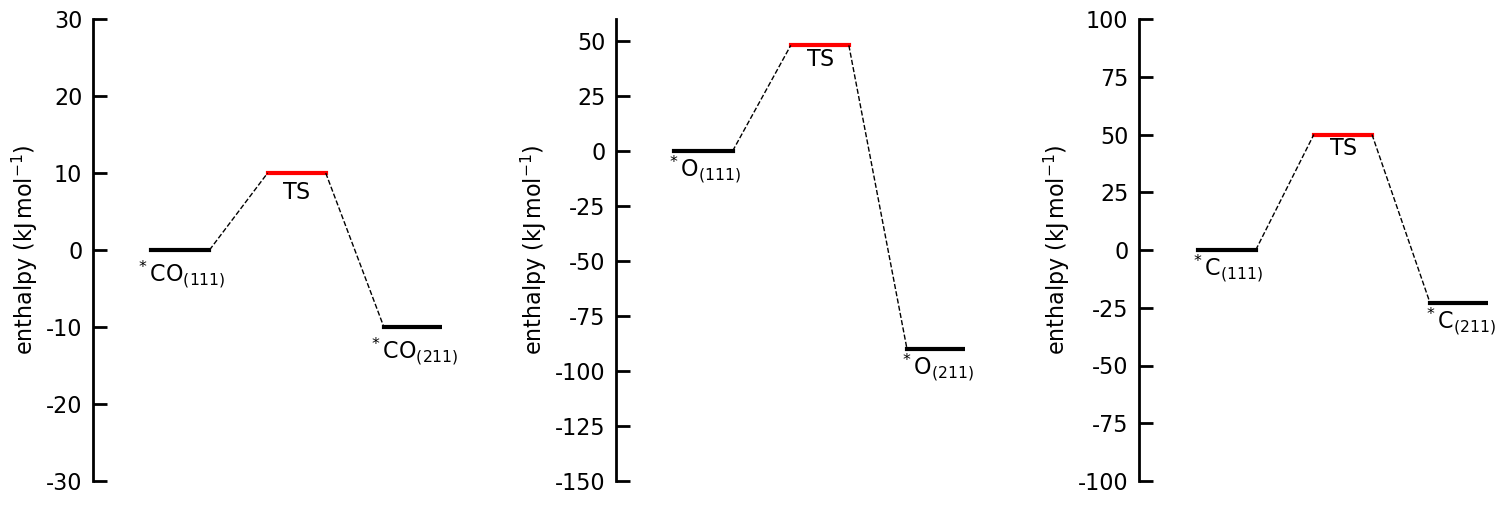

In [40]:
gs = gridspec.GridSpec(nrows=1, ncols=3)
gs.update(wspace=0.5, hspace=0.4)

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])

ax0.set_ylim([-30,30])
ax0.set_xlim([0,3])
ax0.get_xaxis().set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

ax1.set_ylim([-150,60])
ax1.set_xlim([0,3])
ax1.get_xaxis().set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

ax2.set_ylim([-100,100])
ax2.set_xlim([0,3])
ax2.get_xaxis().set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

va_offset=1
idx=surf111.species_index(2)
Hf_CO_111=surf111.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_CO_211=surf211.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6

Hf_ref=Hf_CO_111
#############old approach#####################
#CO_211
initial=Hf_CO_111-Hf_ref
ax0.plot((0.5,1),(initial,initial),linestyle='solid',color='k')
ax0.text(0.75,initial-va_offset,'$\mathrm{^*CO_{(111)}}$',va='top',ha='center',size=16)

#CO_111
ts=Hf_CO_111-Hf_ref+10
ax0.plot((1.5,2),(ts,ts),linestyle='solid',color='r')
ax0.text(1.75,ts-va_offset,'$\mathrm{TS}$',va='top',ha='center',size=16)

#CO_211
final=Hf_CO_211-Hf_ref
ax0.plot((2.5,3),(final,final),linestyle='solid',color='k')
ax0.text(2.75,final-va_offset,'$\mathrm{^*CO_{(211)}}$',va='top',ha='center',size=16)

#connecting lines
ax0.plot((1,1.5),(initial,ts),linestyle='dashed',color='k', linewidth=1)
ax0.plot((2,2.5),(ts,final),linestyle='dashed',color='k', linewidth=1)


####O
idx=surf111.species_index(1)
Hf_O_111=surf111.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_O_211=surf211.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6

Hf_ref=Hf_O_111
#############old approach#####################
#O_211
initial=Hf_O_111-Hf_ref
ax1.plot((0.5,1),(initial,initial),linestyle='solid',color='k')
ax1.text(0.75,initial-va_offset,'$\mathrm{^*O_{(111)}}$',va='top',ha='center',size=16)

#O_111
ts=Hf_O_111-Hf_ref+48
ax1.plot((1.5,2),(ts,ts),linestyle='solid',color='r')
ax1.text(1.75,ts-va_offset,'$\mathrm{TS}$',va='top',ha='center',size=16)

#O_211
final=Hf_O_211-Hf_ref
ax1.plot((2.5,3),(final,final),linestyle='solid',color='k')
ax1.text(2.75,final-va_offset,'$\mathrm{^*O_{(211)}}$',va='top',ha='center',size=16)

#connecting lines
ax1.plot((1,1.5),(initial,ts),linestyle='dashed',color='k', linewidth=1)
ax1.plot((2,2.5),(ts,final),linestyle='dashed',color='k', linewidth=1)

####C
idx=surf111.species_index(3)
Hf_C_111=surf111.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_C_211=surf211.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_ref=Hf_C_111
#C_111
initial=Hf_C_111-Hf_ref
ax2.plot((0.5,1),(initial,initial),linestyle='solid',color='k')
ax2.text(0.75,initial-va_offset,'$\mathrm{^*C_{(111)}}$',va='top',ha='center',size=16)

#C_111
ts=Hf_C_111-Hf_ref+50
ax2.plot((1.5,2),(ts,ts),linestyle='solid',color='r')
ax2.text(1.75,ts-va_offset,'$\mathrm{TS}$',va='top',ha='center',size=16)

#C_211
final=Hf_C_211-Hf_ref
ax2.plot((2.5,3),(final,final),linestyle='solid',color='k')
ax2.text(2.75,final-va_offset,'$\mathrm{^*C_{(211)}}$',va='top',ha='center',size=16)

#connecting lines
ax2.plot((1,1.5),(initial,ts),linestyle='dashed',color='k', linewidth=1)
ax2.plot((2,2.5),(ts,final),linestyle='dashed',color='k', linewidth=1)

plt.savefig('diffusion_barriers_111to211.pdf', bbox_inches='tight', transparent=False)

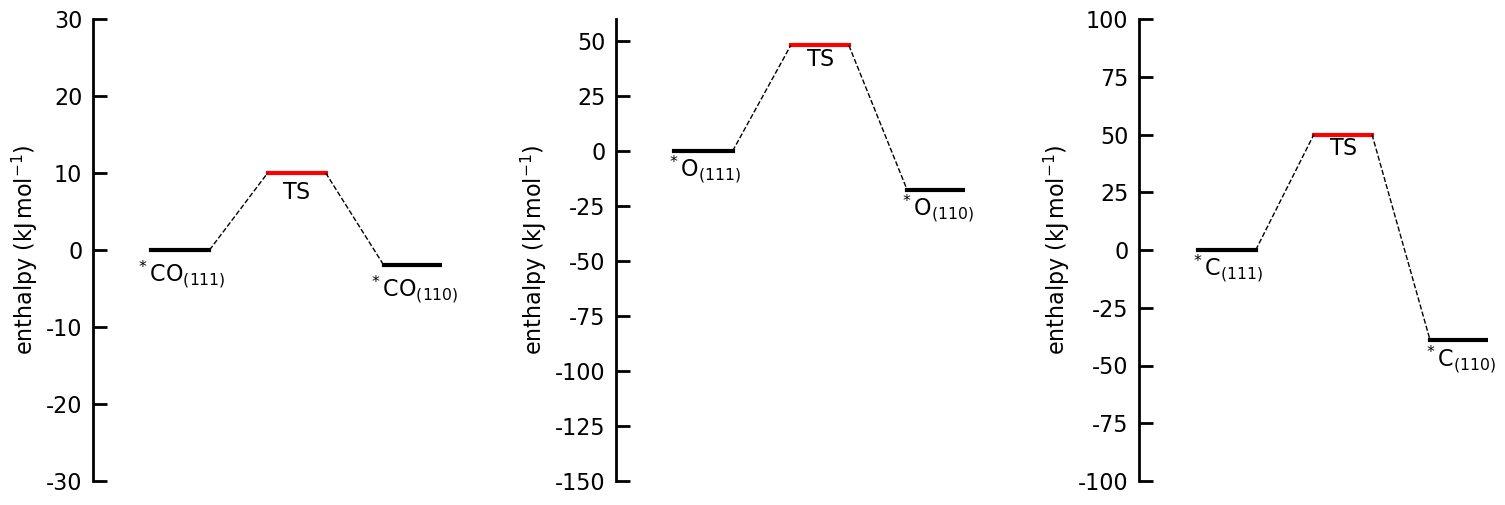

In [17]:
gs = gridspec.GridSpec(nrows=1, ncols=3)
gs.update(wspace=0.5, hspace=0.4)

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])

ax0.set_ylim([-30,30])
ax0.set_xlim([0,3])
ax0.get_xaxis().set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

ax1.set_ylim([-150,60])
ax1.set_xlim([0,3])
ax1.get_xaxis().set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

ax2.set_ylim([-100,100])
ax2.set_xlim([0,3])
ax2.get_xaxis().set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

va_offset=1
idx=surf111.species_index(2)
Hf_CO_111=surf111.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_CO_110=surf110.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6

Hf_ref=Hf_CO_111
#############old approach#####################
#CO_211
initial=Hf_CO_111-Hf_ref
ax0.plot((0.5,1),(initial,initial),linestyle='solid',color='k')
ax0.text(0.75,initial-va_offset,'$\mathrm{^*CO_{(111)}}$',va='top',ha='center',size=16)

#CO_111
ts=Hf_CO_111-Hf_ref+10
ax0.plot((1.5,2),(ts,ts),linestyle='solid',color='r')
ax0.text(1.75,ts-va_offset,'$\mathrm{TS}$',va='top',ha='center',size=16)

#CO_211
final=Hf_CO_110-Hf_ref
ax0.plot((2.5,3),(final,final),linestyle='solid',color='k')
ax0.text(2.75,final-va_offset,'$\mathrm{^*CO_{(110)}}$',va='top',ha='center',size=16)

#connecting lines
ax0.plot((1,1.5),(initial,ts),linestyle='dashed',color='k', linewidth=1)
ax0.plot((2,2.5),(ts,final),linestyle='dashed',color='k', linewidth=1)


####O
idx=surf111.species_index(1)
Hf_O_111=surf111.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_O_110=surf110.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6

Hf_ref=Hf_O_111
#############old approach#####################
#O_211
initial=Hf_O_111-Hf_ref
ax1.plot((0.5,1),(initial,initial),linestyle='solid',color='k')
ax1.text(0.75,initial-va_offset,'$\mathrm{^*O_{(111)}}$',va='top',ha='center',size=16)

#O_111
ts=Hf_O_111-Hf_ref+48
ax1.plot((1.5,2),(ts,ts),linestyle='solid',color='r')
ax1.text(1.75,ts-va_offset,'$\mathrm{TS}$',va='top',ha='center',size=16)

#O_211
final=Hf_O_110-Hf_ref
ax1.plot((2.5,3),(final,final),linestyle='solid',color='k')
ax1.text(2.75,final-va_offset,'$\mathrm{^*O_{(110)}}$',va='top',ha='center',size=16)

#connecting lines
ax1.plot((1,1.5),(initial,ts),linestyle='dashed',color='k', linewidth=1)
ax1.plot((2,2.5),(ts,final),linestyle='dashed',color='k', linewidth=1)

####C
idx=surf111.species_index(3)
Hf_C_111=surf111.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_C_110=surf110.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_ref=Hf_C_111
#C_111
initial=Hf_C_111-Hf_ref
ax2.plot((0.5,1),(initial,initial),linestyle='solid',color='k')
ax2.text(0.75,initial-va_offset,'$\mathrm{^*C_{(111)}}$',va='top',ha='center',size=16)

#C_111
ts=Hf_C_111-Hf_ref+50
ax2.plot((1.5,2),(ts,ts),linestyle='solid',color='r')
ax2.text(1.75,ts-va_offset,'$\mathrm{TS}$',va='top',ha='center',size=16)

#C_211
final=Hf_C_110-Hf_ref
ax2.plot((2.5,3),(final,final),linestyle='solid',color='k')
ax2.text(2.75,final-va_offset,'$\mathrm{^*C_{(110)}}$',va='top',ha='center',size=16)

#connecting lines
ax2.plot((1,1.5),(initial,ts),linestyle='dashed',color='k', linewidth=1)
ax2.plot((2,2.5),(ts,final),linestyle='dashed',color='k', linewidth=1)

#plt.savefig('diffusion_barriers_111to211.pdf', bbox_inches='tight', transparent=False)

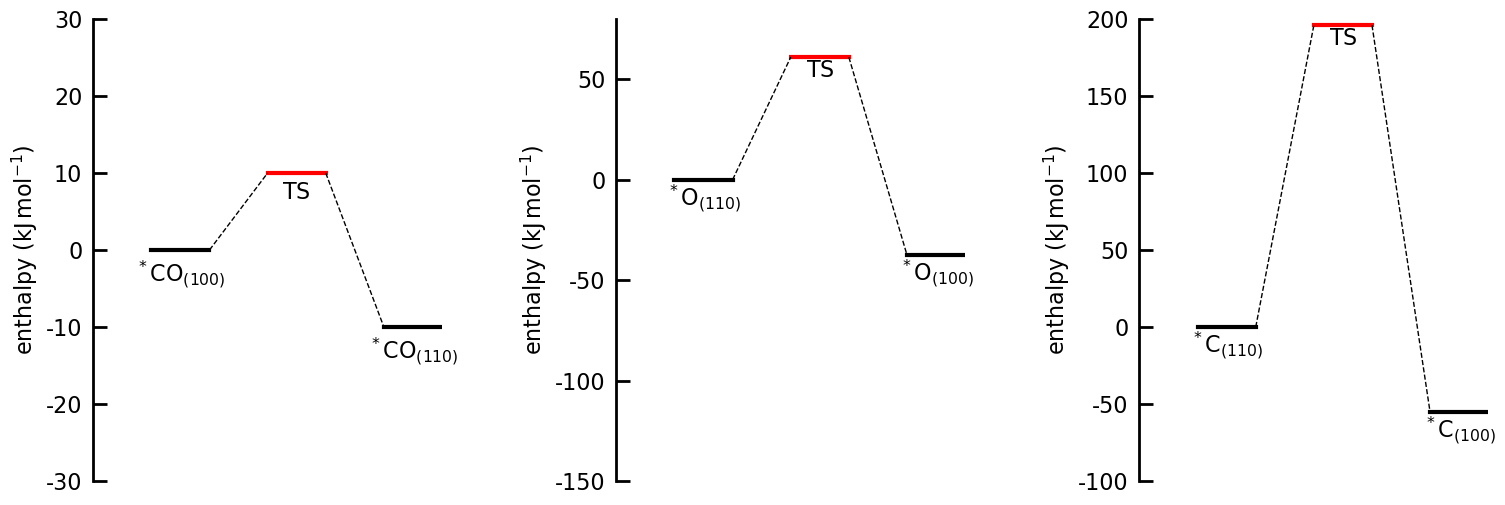

In [24]:
gs = gridspec.GridSpec(nrows=1, ncols=3)
gs.update(wspace=0.5, hspace=0.4)

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])

ax0.set_ylim([-30,30])
ax0.set_xlim([0,3])
ax0.get_xaxis().set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

ax1.set_ylim([-150,80])
ax1.set_xlim([0,3])
ax1.get_xaxis().set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

ax2.set_ylim([-100,200])
ax2.set_xlim([0,3])
ax2.get_xaxis().set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

va_offset=1
idx=surf110.species_index(2)
Hf_CO_110=surf110.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_CO_100=surf100.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6

Hf_ref=Hf_CO_100
#############old approach#####################
#CO_100
initial=Hf_CO_100-Hf_ref
ax0.plot((0.5,1),(initial,initial),linestyle='solid',color='k')
ax0.text(0.75,initial-va_offset,'$\mathrm{^*CO_{(100)}}$',va='top',ha='center',size=16)

#CO_100
ts=Hf_CO_100-Hf_ref+10
ax0.plot((1.5,2),(ts,ts),linestyle='solid',color='r')
ax0.text(1.75,ts-va_offset,'$\mathrm{TS}$',va='top',ha='center',size=16)

#CO_110
final=Hf_CO_110-Hf_ref
ax0.plot((2.5,3),(final,final),linestyle='solid',color='k')
ax0.text(2.75,final-va_offset,'$\mathrm{^*CO_{(110)}}$',va='top',ha='center',size=16)

#connecting lines
ax0.plot((1,1.5),(initial,ts),linestyle='dashed',color='k', linewidth=1)
ax0.plot((2,2.5),(ts,final),linestyle='dashed',color='k', linewidth=1)

####O
idx=surf110.species_index(1)
Hf_O_110=surf110.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_O_100=surf100.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6

Hf_ref=Hf_O_110
#############old approach#####################
#O_110
initial=Hf_O_110-Hf_ref
ax1.plot((0.5,1),(initial,initial),linestyle='solid',color='k')
ax1.text(0.75,initial-va_offset,'$\mathrm{^*O_{(110)}}$',va='top',ha='center',size=16)

#O_110
ts=Hf_O_110-Hf_ref+61
ax1.plot((1.5,2),(ts,ts),linestyle='solid',color='r')
ax1.text(1.75,ts-va_offset,'$\mathrm{TS}$',va='top',ha='center',size=16)

#O_100
final=Hf_O_100-Hf_ref
ax1.plot((2.5,3),(final,final),linestyle='solid',color='k')
ax1.text(2.75,final-va_offset,'$\mathrm{^*O_{(100)}}$',va='top',ha='center',size=16)

#connecting lines
ax1.plot((1,1.5),(initial,ts),linestyle='dashed',color='k', linewidth=1)
ax1.plot((2,2.5),(ts,final),linestyle='dashed',color='k', linewidth=1)

####C
idx=surf111.species_index(3)
Hf_C_110=surf110.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_C_100=surf100.standard_enthalpies_RT[idx]*ct.gas_constant*T/1e6
Hf_ref=Hf_C_110
#C_110
initial=Hf_C_110-Hf_ref
ax2.plot((0.5,1),(initial,initial),linestyle='solid',color='k')
ax2.text(0.75,initial-va_offset,'$\mathrm{^*C_{(110)}}$',va='top',ha='center',size=16)

#C_110
ts=Hf_C_110-Hf_ref+196
ax2.plot((1.5,2),(ts,ts),linestyle='solid',color='r')
ax2.text(1.75,ts-va_offset,'$\mathrm{TS}$',va='top',ha='center',size=16)

#C_100
final=Hf_C_100-Hf_ref
ax2.plot((2.5,3),(final,final),linestyle='solid',color='k')
ax2.text(2.75,final-va_offset,'$\mathrm{^*C_{(100)}}$',va='top',ha='center',size=16)

#connecting lines
ax2.plot((1,1.5),(initial,ts),linestyle='dashed',color='k', linewidth=1)
ax2.plot((2,2.5),(ts,final),linestyle='dashed',color='k', linewidth=1)

#plt.savefig('diffusion_barriers_111to211.pdf', bbox_inches='tight', transparent=False)

<BarContainer object of 4 artists>

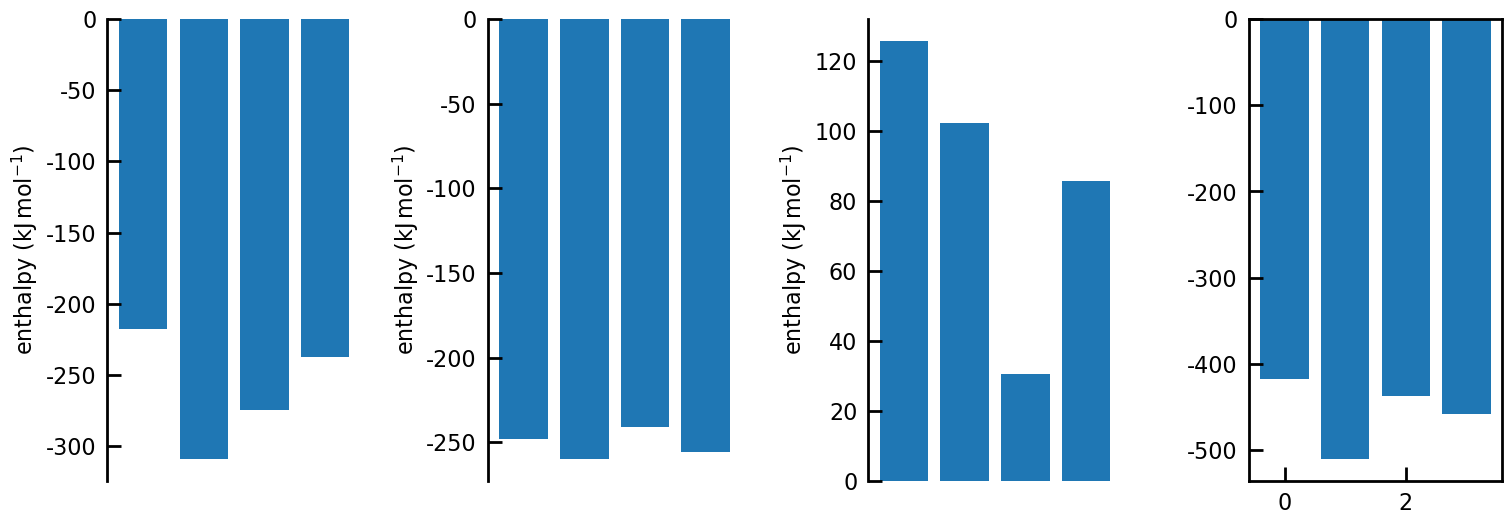

In [44]:
# Compare the different enthalpies of formation of the species
gs = gridspec.GridSpec(nrows=1, ncols=4)
gs.update(wspace=0.5, hspace=0.4)

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])
ax3 = plt.subplot(gs[0, 3])

#ax0.set_ylim([-30,30])
#ax0.set_xlim([0,3])
ax0.get_xaxis().set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

#ax1.set_ylim([-150,80])
#ax1.set_xlim([0,3])
ax1.get_xaxis().set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

#ax2.set_ylim([-100,200])
#ax2.set_xlim([0,3])
ax2.get_xaxis().set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_ylabel('$\mathrm{enthalpy\ (kJ\,mol^{-1})}$')

#Parameters
T=323 #Initial temperature in K
p=1 #pressure in bar

# input file containing the surface reaction mechanism
cti_file = 'Multifacet_mechanism_flipped_reactions_covdep.yaml'

# import the gas model and set the initial conditions
gas = ct.Solution(cti_file, 'gas')
gas.TPX = T, p*ct.one_atm, 'Ar:1, He:0.0, CO2:0.0'

#import the (111) surface
surf111 = ct.Interface(cti_file,'surface1', [gas])
surf111.TP = T, p*ct.one_atm
surf111.coverages = {'site(111)':1 , 'O(111)':0.0, 'OC(111)':0.0 , 'CO2(111)':0}

#import the (211) surface
surf211 = ct.Interface(cti_file,'surface2', [gas])
surf211.TP = T, p*ct.one_atm
surf211.coverages = {'site(211)':1,  'O(211)':0.0, 'OC(211)':0.0 , 'CO2(211)':0}

#import the (100) surface
surf100 = ct.Interface(cti_file,'surface3', [gas])
surf100.TP = T, p*ct.one_atm
surf100.coverages = {'site(100)':1, 'O(100)':0.0, 'OC(100)':0.0, 'CO2(100)':0}

#import the (110) surface
surf110 = ct.Interface(cti_file,'surface4', [gas])
surf110.TP = T, p*ct.one_atm
surf110.coverages = {'site(110)':1, 'O(110)':0.0 , 'OC(110)':0.0  , 'CO2(110)':0}

h111=np.zeros(len(surf111.species()))
h211=np.zeros(len(surf111.species()))
h100=np.zeros(len(surf111.species()))
h110=np.zeros(len(surf111.species()))
for i,j in enumerate(surf111.species()):
   # print(i,j)
    h111[i]=surf111.standard_gibbs_RT[i]*ct.gas_constant*T/1e6
    h211[i]=surf211.standard_gibbs_RT[i]*ct.gas_constant*T/1e6
    h100[i]=surf100.standard_gibbs_RT[i]*ct.gas_constant*T/1e6
    h110[i]=surf110.standard_gibbs_RT[i]*ct.gas_constant*T/1e6

x=np.stack([h111,h211, h100, h110],axis=1)
no=[0,1,2,3]

ax0.bar(no,x[1])
ax1.bar(no,x[2])
ax2.bar(no,x[3])
ax3.bar(no,x[4])

In [4]:
#Give me the thermo properties for the diffusionn of CO(111) + (211)= CO(211) + (111)

#Parameters
T=773 #Initial temperature in K
p=1 #pressure in bar

# input file containing the surface reaction mechanism
cti_file = 'Multifacet_mechanism_flipped_reactions_covdep.yaml'

# import the gas model and set the initial conditions
gas = ct.Solution(cti_file, 'gas')
gas.TPX = T, p*ct.one_atm, 'Ar:1, He:0.0, CO2:0.0'

#import the (111) surface
surf111 = ct.Interface(cti_file,'surface1', [gas])
surf111.TP = T, p*ct.one_atm
surf111.coverages = {'site(111)':1 , 'O(111)':0.0, 'OC(111)':0.0 , 'CO2(111)':0}

#import the (211) surface
surf211 = ct.Interface(cti_file,'surface2', [gas])
surf211.TP = T, p*ct.one_atm
surf211.coverages = {'site(211)':1,  'O(211)':0.0, 'OC(211)':0.0 , 'CO2(211)':0}


idx=surf111.species_index(2)
Hf_CO_111=surf111.standard_gibbs_RT[idx]*ct.gas_constant*T/1e6
Hf_CO_211=surf211.standard_gibbs_RT[idx]*ct.gas_constant*T/1e6


delta_G=Hf_CO_211-Hf_CO_111
delta_G

-14.446244937001836